In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft as fft
from scipy.fftpack import fftfreq as fftfreq
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [2]:
tmp = np.genfromtxt("data/reactionRateData/rate_0/run_0/density_5000.csv", delimiter=',')

In [3]:
tmp.shape

(3, 512)

In [4]:
array = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 25):
        tmp = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/density_5000.csv".format(i,j), delimiter=',')[:, 64:68]
        sum_down = tmp.sum(axis=0)
        array[i] += np.mean(sum_down)
array = array / 25

In [5]:
array

array([0.77748055, 0.78828127, 0.78835937, 0.80269534])

In [6]:
rates = np.array([0.1, 2.5, 5.0, 10.0])

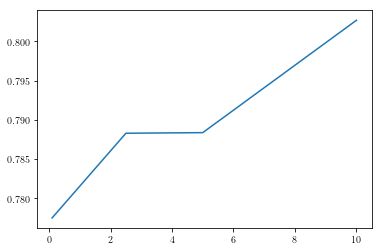

In [7]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(rates, array)

In [8]:
binned_births = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 25):
        tmp1 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_birth_counts_5000.csv".format(i,j), delimiter=',')
        tmp2 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_birth_counts_5010.csv".format(i,j), delimiter=',')
        tmp3 = (tmp2-tmp1)/10        
        sum_down = tmp3.sum(axis=0)
        binned_births[i] += sum_down[17]
binned_births = binned_births / 25

In [14]:
binned_deaths = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 25):
        tmp1 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_death_counts_5000.csv".format(i,j), delimiter=',')
        tmp2 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_death_counts_5010.csv".format(i,j), delimiter=',')
        tmp3 = (tmp2-tmp1)/10        
        sum_down = tmp3.sum(axis=0)
        binned_deaths[i] += sum_down[17]
binned_deaths = binned_deaths / 25

In [15]:
binned_deaths2 = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 25):
        tmp1 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_death_counts_5000.csv".format(i,j), delimiter=',')
        tmp2 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_death_counts_5010.csv".format(i,j), delimiter=',')
        tmp3 = (tmp2-tmp1)/10        
        sum_down = tmp3.sum(axis=0)
        binned_deaths2[i] += sum_down[65]
binned_deaths2 = binned_deaths2 / 25

In [10]:
binned_hops = np.zeros(4)
for i in range(0, 4):
    for j in range (0, 25):
        tmp1 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_diffusion_counts_5000.csv".format(i,j), delimiter=',')
        tmp2 = np.genfromtxt("data/reactionRateData/rate_{}/run_{}/binned_diffusion_counts_5010.csv".format(i,j), delimiter=',')
        tmp3 = (tmp2-tmp1)/10        
        sum_down = tmp3.sum(axis=0)
        binned_hops[i] += sum_down[17]
binned_hops = binned_hops / 25

In [21]:
binned_reactions = binned_births + binned_deaths + binned_hops

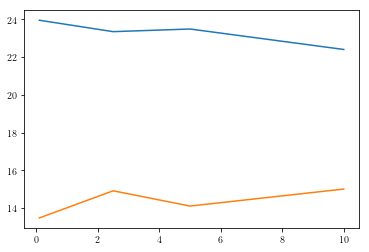

In [16]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(rates, binned_deaths)
ax2.plot(rates, binned_deaths2)